Accuracy: 0.8381019098886513

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     64871
           1       0.83      0.26      0.39     16495

    accuracy                           0.84     81366
   macro avg       0.83      0.62      0.65     81366
weighted avg       0.84      0.84      0.80     81366



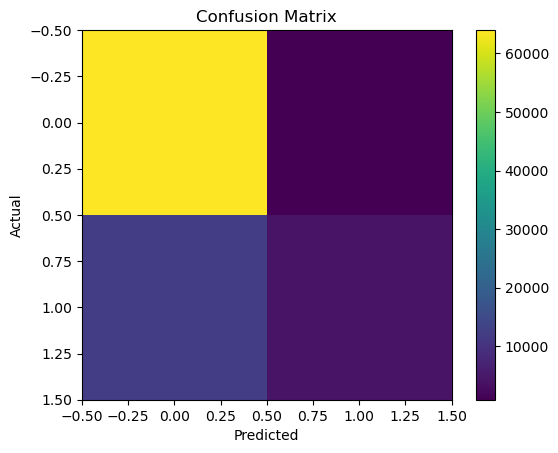

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv(
    "C:/Users/fuad7/Documents/Sem 5/New folder/customer_data.csv",
    encoding="ISO-8859-1"
)

data = data.dropna()

data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

threshold = data["TotalPrice"].mean()
data["HighValue"] = (data["TotalPrice"] > threshold).astype(int)

X = data[["Quantity", "UnitPrice"]]
y = data["HighValue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

